In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

* Load dataset.

In [5]:
df = pd.read_csv("D:\Progetti\Forum Page Views\pageviews.csv", parse_dates=['date'])

In [6]:
df.head(5)

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


* Remove extreme values. Remove values higher than 97.5th percentile and lower than 2.5th percentile.

In [7]:
q1 = df.value.quantile(0.025)
q4 = df.value.quantile(0.975)

In [8]:
df = df.apply(lambda x: x[df.value < q4] )
df = df.apply(lambda x: x[df.value > q1])

* Plot forum views over time.

[Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')]

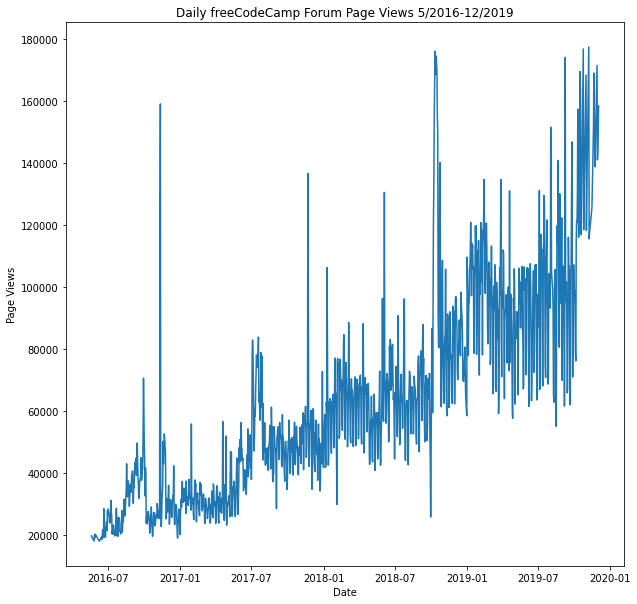

In [9]:
plt.figure(figsize=(10,10))
fig = sns.lineplot(x= df.date, y= df.value, data=df)
fig.set_xlabel('Date')
fig.set_ylabel('Page Views')
fig.set(title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

* Preparing data for barplot. Data is aggregated by date and by month. 

In [10]:
df_bar = df.groupby(pd.Grouper(key='date', freq='1M')).mean().reset_index()
df_month = df_bar['date'].dt.month_name()
Months = ['January','February','March','April','May','June','July','August','September','October','November','December']

* Plot data.

Text(0, 0.5, 'Average Page Views')

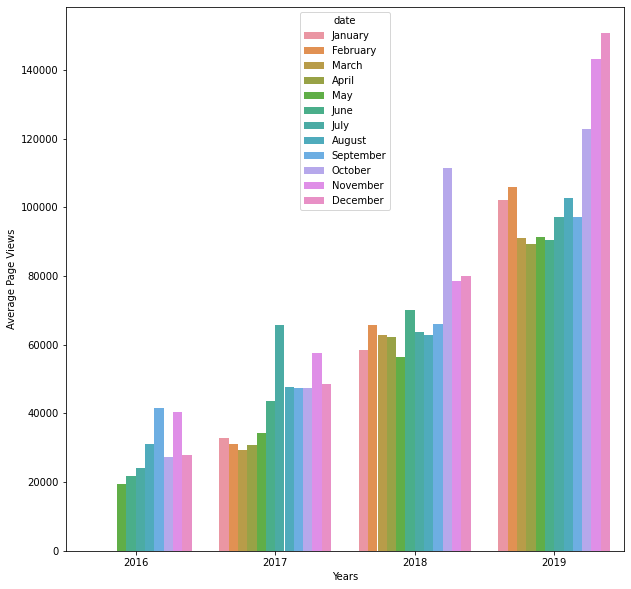

In [11]:
plt.figure(figsize= (10,10))
fig = sns.barplot(x= df_bar['date'].dt.year, y='value', hue= df_month, hue_order = Months, data= df_bar)
fig.set_xlabel('Years')
fig.set_ylabel('Average Page Views')

In [12]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box.head()

,index,date,value,year,month
0,10,2016-05-19,19736,2016,May
1,17,2016-05-26,18060,2016,May
2,18,2016-05-27,19997,2016,May
3,19,2016-05-28,19044,2016,May
4,20,2016-05-29,20325,2016,May


* Visualize boxplot.

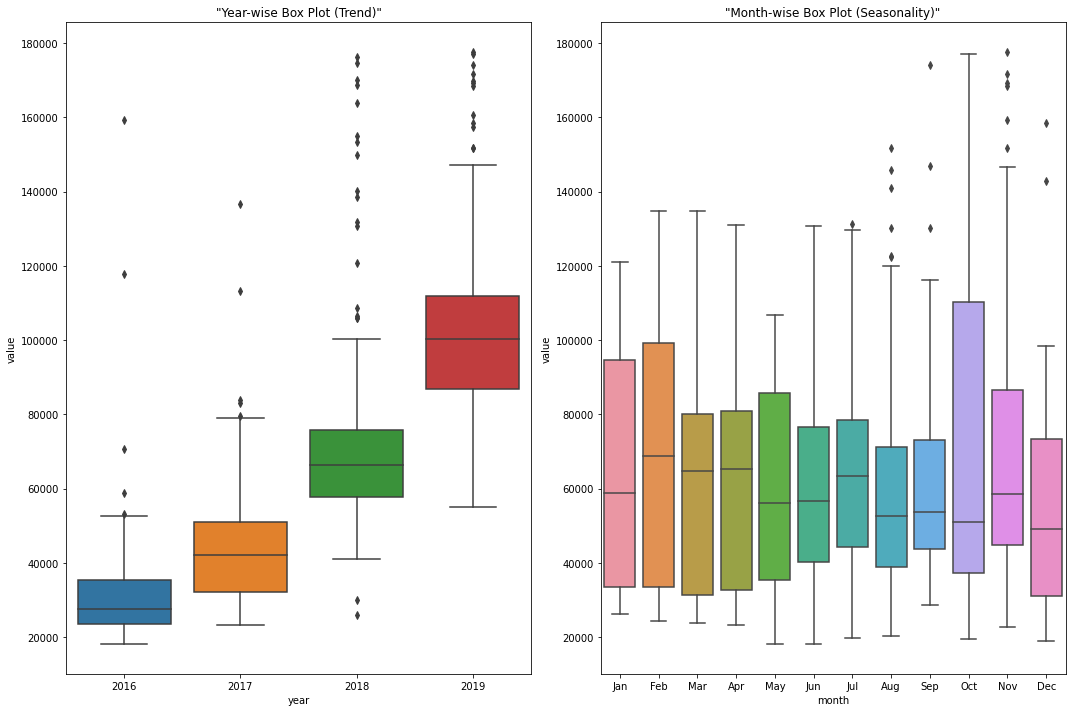

In [13]:
Months_2 = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
fig, axes = plt.subplots(1,2,figsize=(15,10))
g = sns.boxplot(x='year', y = 'value', data= df_box, ax = axes[0])
h = sns.boxplot(x='month', y = 'value', order=Months_2, data = df_box, ax = axes [1])
g.set_title('"Year-wise Box Plot (Trend)"')
h.set_title('"Month-wise Box Plot (Seasonality)"')
fig.tight_layout()